In [1]:
import pandas as pd
import numpy as np
import copy
import itertools as itr
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 150

In [2]:
%store -r mgd_df

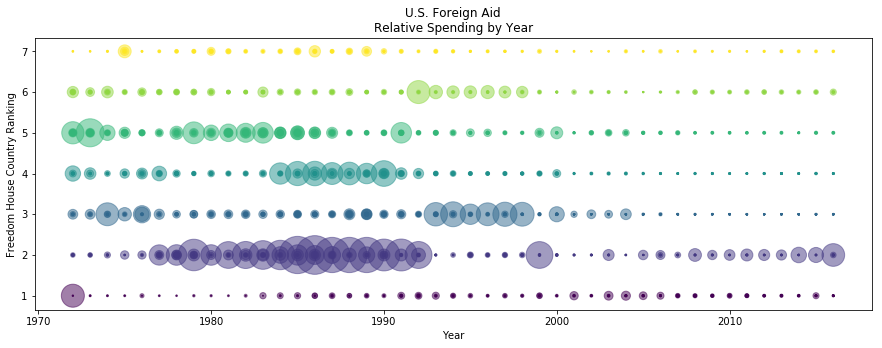

,country_name,Year,FH_value,current_amount,constant_amount,current_diff,constant_diff,current_pct_chg,constant_pct_chg,FH_diff,FH_pct_change,FH_pct_rolling5
0,Afghanistan,1972,5.0,5.134143e+06,2.323853e+07,2.363143e+06,1.010229e+07,0.852812,0.769040,NaN,NaN,NaN
1,Afghanistan,1973,6.0,6.468000e+06,2.805325e+07,1.333857e+06,4.814714e+06,0.259801,0.207187,1.0,0.200000,NaN
2,Afghanistan,1974,6.0,2.848400e+06,1.153898e+07,-3.619600e+06,-1.651427e+07,-0.559617,-0.588676,0.0,0.000000,NaN
3,Afghanistan,1975,6.0,4.298200e+06,1.577853e+07,1.449800e+06,4.239546e+06,0.508988,0.367411,0.0,0.000000,NaN
4,Afghanistan,1976,6.0,1.495556e+06,5.084007e+06,-2.802644e+06,-1.069452e+07,-0.652051,-0.677789,0.0,0.000000,NaN
5,Afghanistan,1977,6.0,5.416250e+06,1.734449e+07,3.920694e+06,1.226048e+07,2.621564,2.411578,0.0,0.000000,0.040000
6,Afghanistan,1978,7.0,2.354200e+06,7.064507e+06,-3.062050e+06,-1.027998e+07,-0.565345,-0.592694,1.0,0.166667,0.033333
7,Afghanistan,1979,7.0,2.654000e+06,7.370969e+06,2.998000e+05,3.064620e+05,0.127347,0.043381,0.0,0.000000,0.033333
8,Afghanistan,1980,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.033333
9,Afghanistan,1981,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.033333


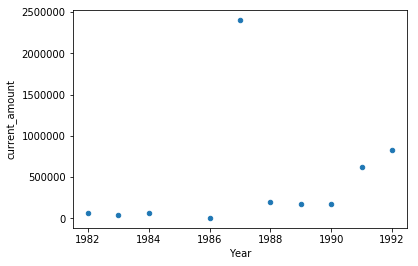

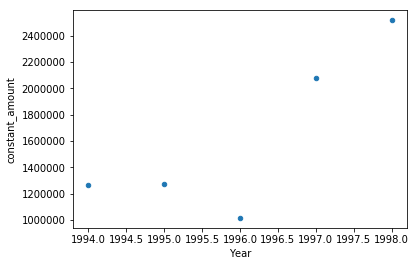

In [4]:
x = mgd_df.Year
y = mgd_df.FH_value
colors = mgd_df.FH_value
areax = mgd_df.current_amount  
area = (areax-min(areax))/(max(areax)-min(areax))*1500  # 0 to 15 point radii times 100
plt.figure(figsize=(15, 5))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Freedom House Country Ranking')
plt.title('U.S. Foreign Aid\nRelative Spending by Year')
plt.show()

# country case picker
mgd_df[(mgd_df.Year > 1979 ) & (mgd_df.Year < 1993 ) & (mgd_df.country_name == 'Argentina')]\
.sort_values(by='current_amount', ascending=False).plot(x='Year', y='current_amount', kind='scatter')

# browser for FH == 2
mgd_df[(mgd_df.Year > 1979 ) & (mgd_df.Year < 1993 ) & (mgd_df.FH_value == 2.0)]\
.sort_values(by='current_amount', ascending=False).head()

## FH == 3 1993-1999

# FH CL 3 countries '93 to '99
mgd_df[(mgd_df.Year > 1993 ) & (mgd_df.Year < 1999 ) & (mgd_df.FH_value == 6.0)].country_name.unique()

# country case picker
mgd_df[(mgd_df.Year > 1993 ) & (mgd_df.Year < 1999 ) & (mgd_df.country_name == 'Peru')]\
.sort_values(by='current_amount', ascending=False).plot(x='Year', y='constant_amount', kind='scatter')

mgd_df[(mgd_df.Year > 1993 ) & (mgd_df.Year < 1999 ) & (mgd_df.FH_value == 3.0)]\
.sort_values(by='constant_amount', ascending=False)[:20]

mgd_df

# df = df[df["col"].str.contains("WORD1|WORD2")]

In [ ]:
np.random.seed(0)

x, y = np.random.randn(2, 100)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.xcorr(x, y, usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)
ax1.axhline(0, color='black', lw=2)

ax2 = fig.add_subplot(212, sharex=ax1)
ax2.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)
ax2.axhline(0, color='black', lw=2)